# Evaluate Grid Search
In this notebook, I want to analyse the results from a conducted grid search over GCN hyper-parameters.
This should show me which ones perform best.

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

/home/sasse/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Box Plot of Best Cross-Validation Runs
At first, I want to investigate the best grid search runs. The problem is here that I only reported accuracy and loss but not the famous and very much desired AUPR value.
I now report that as well but until the second grid search has finished, I have to try to normalize for the number of predictions, too.

In [2]:
# open grid search results
with open('../data/gridsearch/gridsearchcv_results_multiomics_norm.pkl', 'rb') as f:
    performances = pickle.load(f)

### Balanced Training Set
This means that I used a subsampled set of negatives for training.

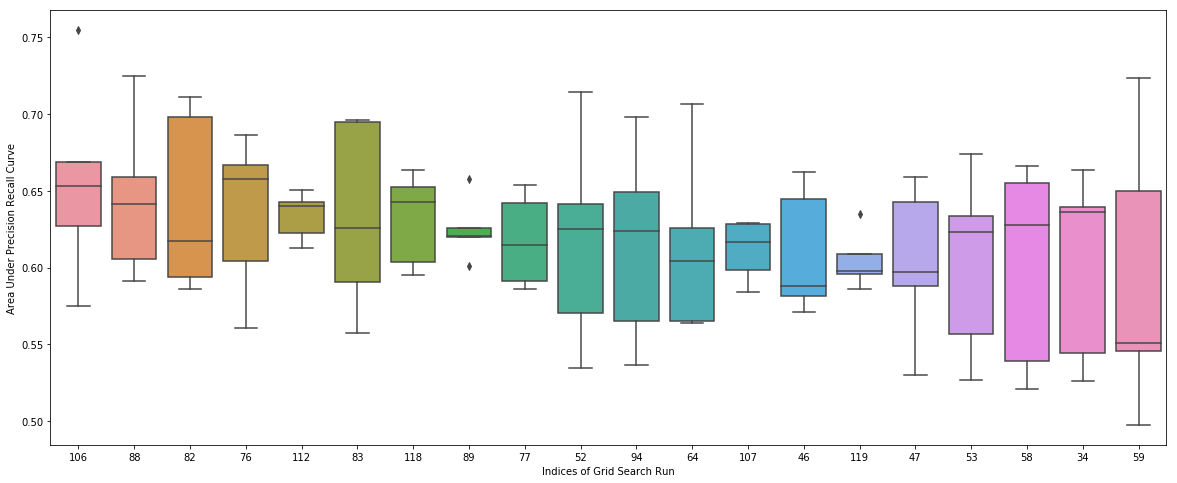

In [3]:
num_to_print = 20
aupr_sorted = sorted(performances, key=lambda x: np.mean(x[3]),
                     reverse=True)
aupr_only = [p[3] for p in aupr_sorted]
indices = np.argsort([np.mean(p[3]) for p in performances])[::-1]

fig, ax = plt.subplots(figsize=(20, 8))
#fig = plt.figure(figsize=(14,  8))
x = seaborn.boxplot(data=aupr_only[:num_to_print])
#x = seaborn.swarmplot(data=aupr_only[:num_to_print])
x.set_xticklabels(indices[:num_to_print])
ax.set_ylabel('Area Under Precision Recall Curve')
ax.set_xlabel('Indices of Grid Search Run')
fig.savefig('boxplot_best_{}_aupr.png'.format(num_to_print), dpi=300)

In [17]:
performances[106]

([0.36631215, 0.2855965, 0.30406463, 0.4524693, 0.45329377],
 [1.1581386, 1.1819099, 1.1880723, 1.115857, 1.1172074],
 [7747, 8742, 8513, 6697, 6687],
 [0.6530611, 0.75504273, 0.6688655, 0.6268399, 0.574716],
 {'dropout': 0.75,
  'epochs': 2000,
  'hidden_dims': [50, 100],
  'learningrate': 0.001,
  'loss_mul': 40,
  'support': 1,
  'weight_decay': 0.0005})

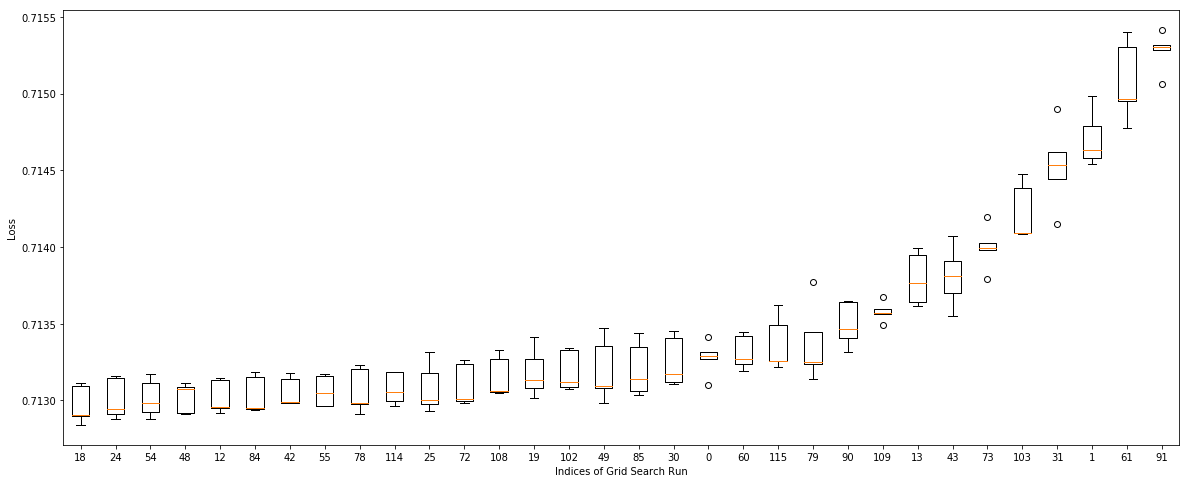

In [11]:
num_to_print = 32
all_losses = [p[1] for p in performances]
sorted_loss = sorted(all_losses, key=lambda x: np.mean(x), reverse=False)
indices = np.argsort(np.mean(all_losses, axis=1))#[::-1]

fig, ax = plt.subplots(figsize=(20, 8))
x = plt.boxplot(sorted_loss[:num_to_print], labels=indices[:num_to_print])
ax.set_ylabel('Loss')
ax.set_xlabel('Indices of Grid Search Run')
fig.savefig('boxplot_best_{}_loss.png'.format(num_to_print), dpi=300)

### Unbalanced Training Set
This means that I simply used a certain percentage of examples from both classes for training.

In [6]:
with open('../data/gridsearch/gridsearchcv_results_multiomics_norm.pkl', 'rb') as f:
    performances = pickle.load(f)
    print (len(performances))

120


72
72 120


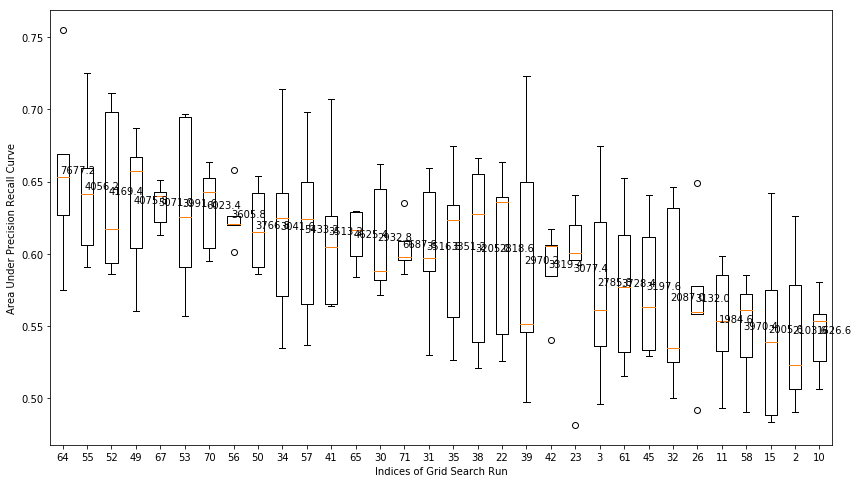

In [7]:
def boxplot_performances(perf, num_to_plot, sort_func, reverse=True, index_to_show=2):
    perf_sorted = sorted(perf, key=sort_func, reverse=reverse)
    indices = np.argsort([sort_func(p) for p in perf])
    if reverse:
        indices = indices[::-1]
    to_show = [p[index_to_show] for p in perf_sorted]
    
    # plot boxplot
    fig, ax = plt.subplots(figsize=(14, 8))
    x = plt.boxplot(to_show[:num_to_print], labels=indices[:num_to_print])
    # plot upper labels
    x_pos = np.arange(num_to_plot) + 1
    y_pos = [np.mean(x[index_to_show]) for x in perf_sorted]
    labels = [str(np.mean(x[2])) for x in perf_sorted]
    
    for tick, label in zip(range(num_to_plot), ax.get_xticklabels()):
        ax.text(x_pos[tick]-.1, y_pos[tick], labels[tick])

    ax.set_ylabel('Area Under Precision Recall Curve')
    ax.set_xlabel('Indices of Grid Search Run')
    fig.savefig('boxplot_best_{}_aupr.png'.format(num_to_print), dpi=300)

pp38 = [p for p in performances if np.mean(p[2]) >= 1]
print (len(pp38))
print (len(pp38), len(performances))
boxplot_performances(pp38,
                     max(32, len(pp38)),
                     lambda x: np.mean(np.array(x[3])),
                     reverse=True,
                     index_to_show=3) # 2=number of predictions

In [9]:
pp38[64]

([0.36631215, 0.2855965, 0.30406463, 0.4524693, 0.45329377],
 [1.1581386, 1.1819099, 1.1880723, 1.115857, 1.1172074],
 [7747, 8742, 8513, 6697, 6687],
 [0.6530611, 0.75504273, 0.6688655, 0.6268399, 0.574716],
 {'dropout': 0.75,
  'epochs': 2000,
  'hidden_dims': [50, 100],
  'learningrate': 0.001,
  'loss_mul': 40,
  'support': 1,
  'weight_decay': 0.0005})

In [ ]:
num_to_print = 15
all_losses = [p[1] for p in performances]
sorted_loss = sorted(all_losses, key=lambda x: np.mean(x), reverse=False)
indices = np.argsort(np.mean(all_losses, axis=1))

fig, ax = plt.subplots(figsize=(14, 8))
x = plt.boxplot(sorted_loss[:num_to_print], labels=indices[:num_to_print])
ax.set_ylabel('Loss')
ax.set_xlabel('Indices of Grid Search Run')
fig.savefig('boxplot_best_{}_loss.png'.format(num_to_print), dpi=300)

In [11]:
performances[97]

([0.93499124, 0.94308406, 0.94107443, 0.94087744, 0.9414343],
 [0.84231704, 0.84230876, 0.842315, 0.8423124, 0.8423075],
 [0, 0, 0, 0, 0],
 [0.045456177524831214,
  0.05019871780054579,
  0.04792370812523782,
  0.038792623494067056,
  0.03894604904671168],
 {'dropout': 0.5,
  'epochs': 1000,
  'hidden_dims': [5, 40, 5],
  'learningrate': 0.1,
  'loss_mul': 175,
  'support': 2,
  'weight_decay': 0.0005})